## Thera Bank Personal Loan Campaign

#### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Q1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read Data
df= pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
# Glance into the data
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#check the shape of the data
df.shape

(5000, 14)

In [5]:
#Check datatypes
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Insights from info
    - no null value in the data
 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Insights form the describe
- There are negative values in Experience column

In [8]:
df.nunique() 

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [9]:
# count of Negative values in Expreience
df[df['Experience']<0]['ID'].count()



52

In [10]:
#to check the Range of positive numbers in experience
df[df['Experience']>=0]['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

## Impute negative values in experience

In [11]:
df[df['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [12]:
# to replace the negative value   make the negatives to NAN 
df['Experience'] = list(map( lambda x : np.nan if x<0 else x,df['Experience']))

In [13]:
# check and verify nan count
df[df['Experience'].isnull()]['ID'].count()

52

In [14]:
#check median
df['Experience'].median()

20.0

In [15]:
# replace the NAN with Median 
df['Experience'].fillna(df['Experience'].median(), inplace=True)


In [16]:
# recheck and verify nan count
df[df['Experience'].isnull()]['ID'].count()

0

In [17]:
df['Experience'].median()

20.0

In [18]:
#Check null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [19]:
# Correlation  datafarame saved for  Later Analysis
dfCorr=df.corr()

In [20]:
#Convert Personal Loan ,Securities Account,CD Account,Online ,CreditCard  To Categorical variable as they have only 2 value s
df['Personal Loan']=df['Personal Loan'].astype('category')
df['Securities Account']=df['Securities Account'].astype('category')
df['CD Account']=df['CD Account'].astype('category')
df['Online']=df['Online'].astype('category')
df['CreditCard']=df['CreditCard'].astype('category')
# Family and Education can also be convert into category as there are only  4 nd 3 unique values respecively
df['Family']=df['Family'].astype('category')
df['Education']=df['Education'].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   float64 
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(2), int64(5)
memory usage: 308.5 KB


In [22]:
# ID is the refrence number and has 5000 unique values , Does not provide information to the algorithm, So Drop ID 
df_bank= df.drop('ID', axis=1)

### Q2.   Study the data distribution in each attribute and target variable, share your findings 


####  Number of unique in each column?

In [23]:
df_bank.nunique()

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

#### Number of people with zero mortgage?


In [24]:
df_bank[df_bank['Mortgage']==0]['Mortgage'].count()

3462

#### Number of people with zero credit card spending per month?

In [25]:
df_bank[df_bank['CCAvg']==0]['CCAvg'].count()

106

#### Value counts of all categorical columns.

In [26]:
for i in list(df_bank.columns[df_bank.dtypes=='category']):   # checking value counts of all object type category
    print(df_bank[i].value_counts(normalize=True))
    print()

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64



### Univariate Analysis

#### Distplot for Continuous variables


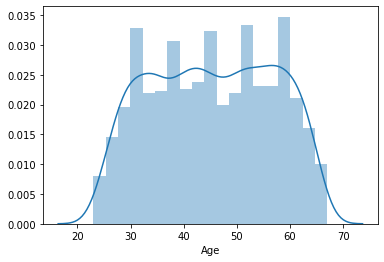

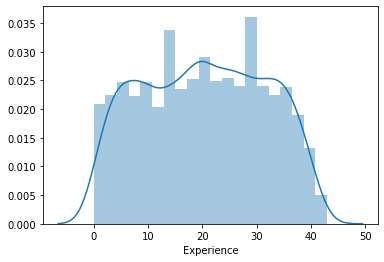

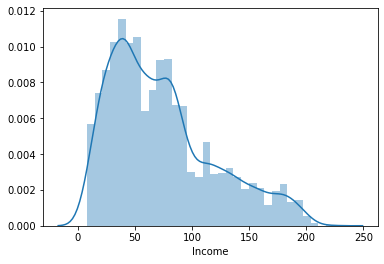

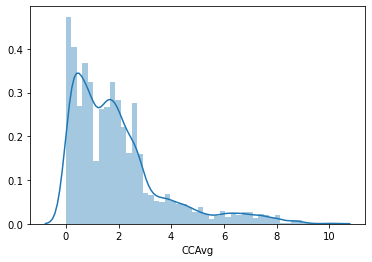

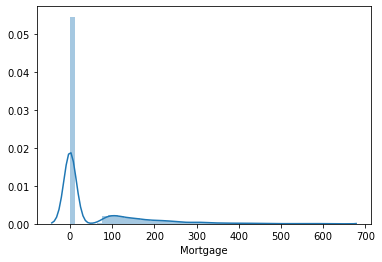

In [27]:
for i in ['Age','Experience','Income','CCAvg','Mortgage']:
    sns.distplot(df_bank[i])
    plt.show()

In [28]:
df_bank[['Age','Experience','Income','CCAvg','Mortgage']].skew()

Age          -0.029341
Experience   -0.014100
Income        0.841339
CCAvg         1.598443
Mortgage      2.104002
dtype: float64

### Insights
#### Highy skewed data in Income ,CCAvg and Mortgage , in the case of bank customers this is an expected behaviour and not treating the skewed data 

### Countplot to Analyse the Categorical variables

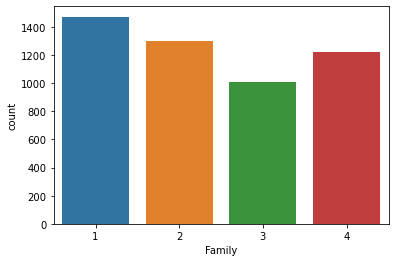

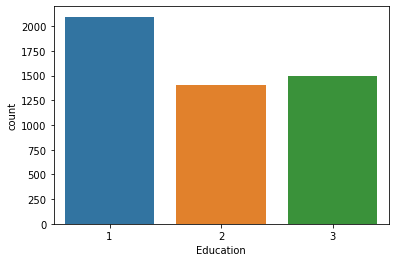

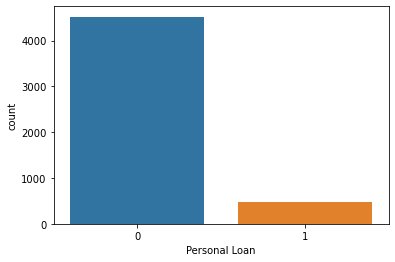

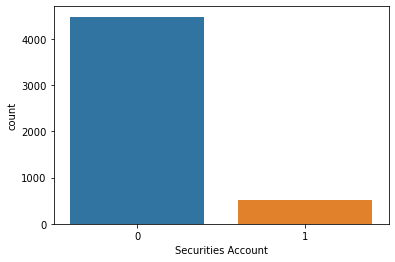

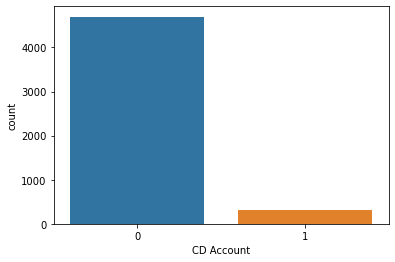

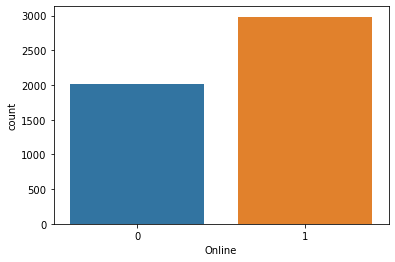

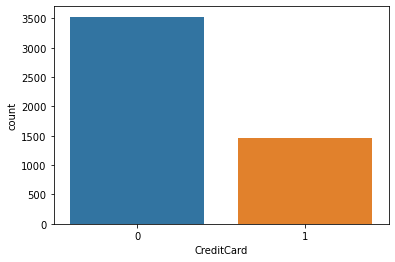

In [29]:
for i in list(df_bank.columns[df_bank.dtypes=='category']):   # checking value counts of all object type category
    sns.countplot(df_bank[i])
    plt.show()

## Bivariate Analysis

In [30]:
#analyse the Target Variable and the relation with the continuous variable
df_bank.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
Personal Loan,,,,,,
0,45.367257,20.378982,66.237389,93152.428761,1.729009,51.789381
1,45.066667,19.843750,144.745833,93153.202083,3.905354,100.845833


In [31]:
df_bank.groupby(["Personal Loan"]).median()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
Personal Loan,,,,,,
0,45.0,20.0,59.0,93437.0,1.4,0.0
1,45.0,20.0,142.5,93407.0,3.8,0.0


### Insights
#### The Customers who accepted the loan  depends highy  on the Income and the Creditcard average spending

In [32]:
 pd.crosstab(df_bank['Family'],df_bank['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


In [33]:
df_bank.groupby(['Personal Loan','Education'])['Family'].value_counts()

Personal Loan  Education  Family
0              1          1         669
                          2         653
                          4         372
                          3         309
               2          4         381
                          3         339
                          1         286
                          2         215
               3          1         410
                          4         335
                          2         322
                          3         229
1              1          3          40
                          4          40
                          1           9
                          2           4
               2          2          50
                          4          48
                          3          44
                          1          40
               3          1          58
                          2          52
                          3          49
                          4          46
Name: F

###  Insights Undergraduate with  1 or 2 family members  does not accept too many personal loans (count 9 and  4 above)

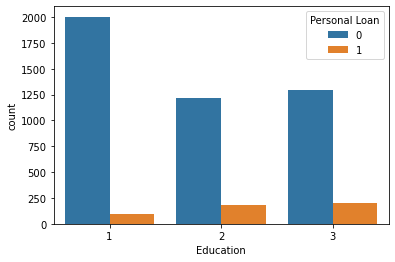

In [34]:
sns.countplot(x=df_bank['Education'],hue=df_bank['Personal Loan'])

### Insights
#### Undergraduates  accept less personal loans

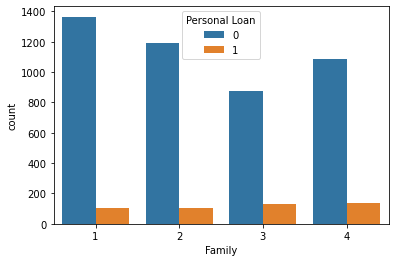

In [35]:
sns.countplot(x=df_bank['Family'],hue=df_bank['Personal Loan'])

In [36]:


pd.crosstab(df_bank['Family'],df_bank['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


### Insights
#### Bigger Families accept more personal loans

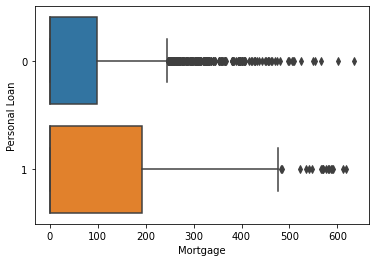

In [37]:
## Check relation between Mortgage and acceptance of Personal loan
sns.boxplot('Mortgage','Personal Loan',data=df_bank)

### Insights
#### Customers who accepted the personal loan tend to have higher mortgages 

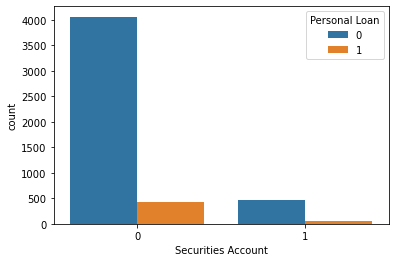

In [38]:
# Relation between Securities Account and personal loan
sns.countplot(x=df_bank['Securities Account'],hue=df_bank['Personal Loan'])

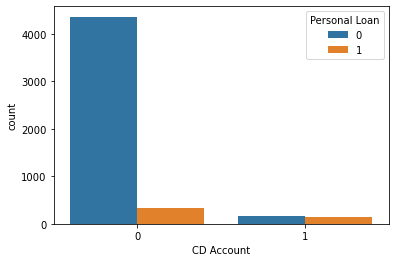

In [39]:
# Relation between CD Account and personal loan
sns.countplot(x=df_bank['CD Account'],hue=df_bank['Personal Loan'])

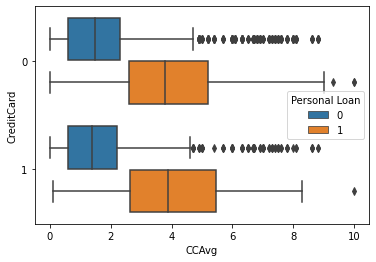

In [40]:
#find out  Relation on Creditcard Average spending with Personal loan
sns.boxplot(x="CCAvg", y="CreditCard", data=df_bank, hue='Personal Loan')

### Insights
#### Customers who accepted the personal loan tend to have higher average spend on credit cards

#### Correlation 

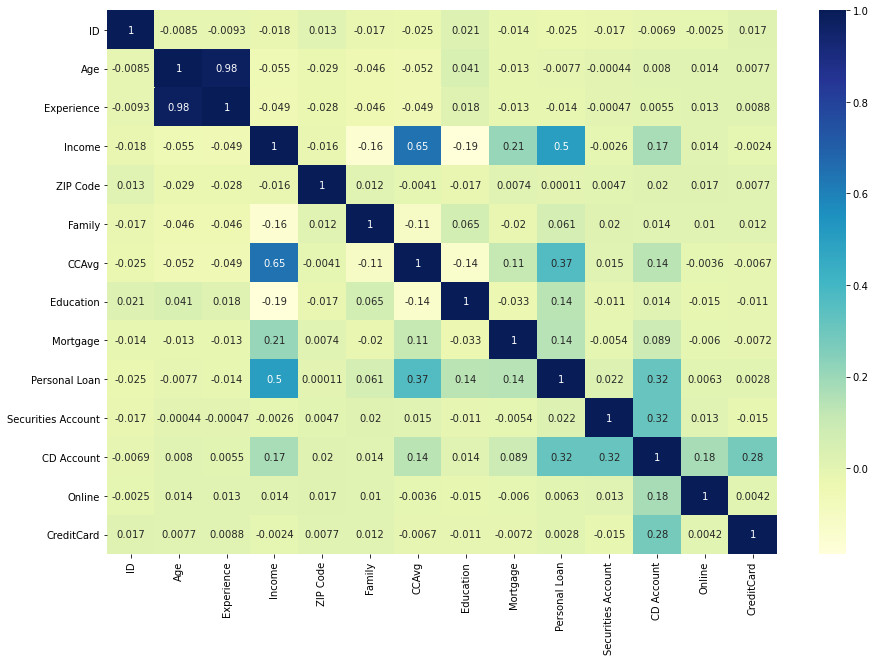

In [41]:
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(dfCorr, annot=True,cmap="YlGnBu")

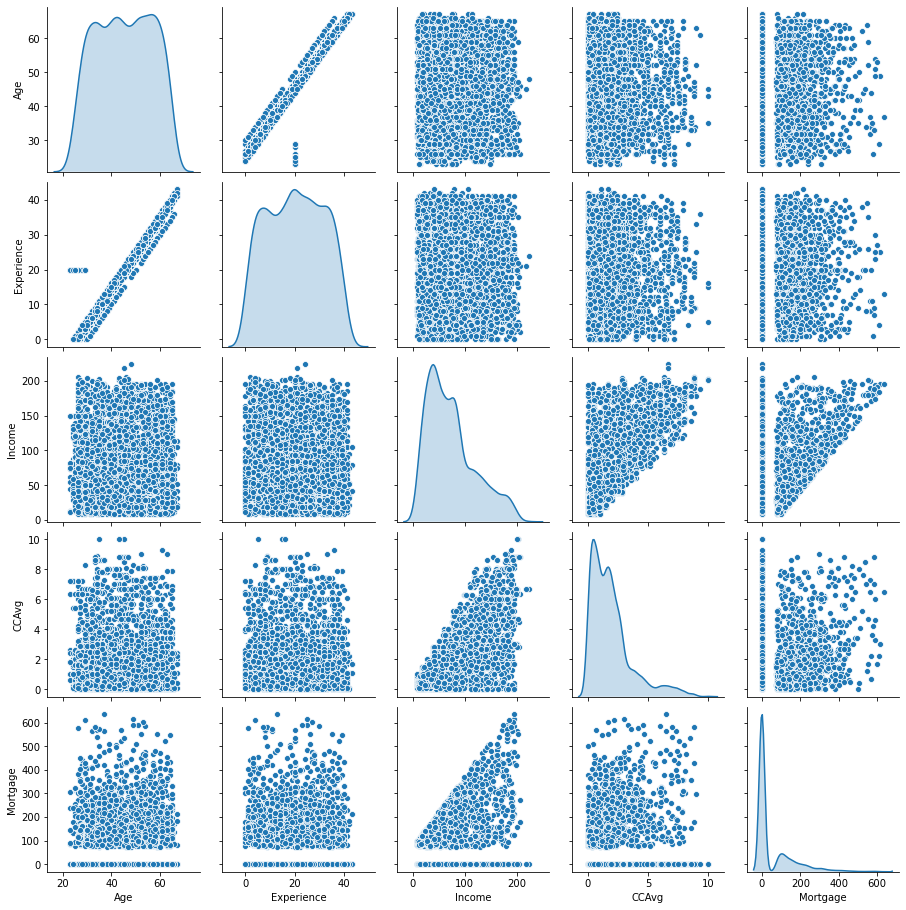

In [42]:
sns.pairplot(df_bank[['Age','Experience','Income','CCAvg','Mortgage']],diag_kind='kde')

### Get data model ready


In [43]:
# Dropping the column Zipcode from the data set .There is no correlation shown for zipcode in the heatmap.
#so assuming that demographics will not come into play when applying for the loan

df_bank.drop('ZIP Code',  axis=1 ,inplace =True)

In [44]:
#Calculate the 0 and 1 proportion for personal loan - ratio of Yes to No to identify data imbalance
baselineProp = df_bank['Personal Loan'].value_counts(normalize=True)
print(baselineProp)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


### Insights
#### Imbalance in the 'Personal Loan' column which is our target variable

In [45]:
# Define Xand Y  . The Y variable is personal Loan 
X=df_bank.drop('Personal Loan',axis=1)
Y=df_bank[['Personal Loan']]


In [46]:
X=pd.get_dummies(X,drop_first=True)

In [47]:
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1.0,49,1.6,0,0,0,1,0,0,1,0,0,0
1,45,19.0,34,1.5,0,0,1,0,0,0,1,0,0,0
2,39,15.0,11,1.0,0,0,0,0,0,0,0,0,0,0
3,35,9.0,100,2.7,0,0,0,0,1,0,0,0,0,0
4,35,8.0,45,1.0,0,0,0,1,1,0,0,0,0,1


## 3. Split the data into training and test set in the ratio of 70:30 respectively

In [48]:
#split data into  70:30
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.30,random_state=7)

## 4.Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance

### Logistic regression using stat model for Analysis

In [49]:
logit=sm.Logit(Y_train,sm.add_constant(X_train))
lg=logit.fit()

Optimization terminated successfully.
         Current function value: 0.119817
         Iterations 9


In [50]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                  0.6256
Time:                        23:44:56   Log-Likelihood:                -419.36
converged:                       True   LL-Null:                       -1120.1
Covariance Type:            nonrobust   LLR p-value:                7.711e-291
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.6717      1.407     -9.720      0.000     -16.428     -10.915
Age                      0.0474      0.048      0.993      0.321      -0.046       0.141
Experience              -0.0414      0.048     -0.861      0.389      -0.136       0.053
Income                   0.0596      0.004     16.876      0.000       0.053       0.067
CCAvg                    0.1979      0.054      3.651      0.000       0.092       0.304
Mortgage                 0.0009      0.001      1.247      0.213      -0.000       0.002
Family_2                -0.0609      0.274     -0.223      0.824      -0.597       0.475
Family_3                 1.9980      0.297      6.721      0.000       1.415       2.581
Family_4                 1.8770      0.283      6.644      0.000       1.323       2.431
Education_2              3.6989      0.320     11.567      0.000       3.072       4.326
Education_3              3.9142      0.312     12.551      0.000       3.303       4.525
Securities Account_1    -0.6962      0.354     -1.965      0.049      -1.391      -0.002
CD Account_1             3.4665      0.415      8.359      0.000       2.654       4.279
Online_1                -0.6186      0.195     -3.175      0.001      -1.000      -0.237
CreditCard_1            -0.9449      0.250     -3.777      0.000      -1.435      -0.455
========================================================================================

Possibly complete quasi-separation: A fraction 0.10 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Insights
Pseudo Rsquare indicates 62% of variability is explained by the model

In [51]:
lg.params

const                  -13.671703
Age                      0.047422
Experience              -0.041430
Income                   0.059628
CCAvg                    0.197948
Mortgage                 0.000859
Family_2                -0.060917
Family_3                 1.998045
Family_4                 1.876993
Education_2              3.698867
Education_3              3.914167
Securities Account_1    -0.696235
CD Account_1             3.466478
Online_1                -0.618629
CreditCard_1            -0.944948
dtype: float64

#### Calculate Odds Ratio , probability  and pvalues

In [52]:
dfCoef=pd.DataFrame(lg.params, columns=['Coef'])
dfCoef

,Coef
const,-13.671703
Age,0.047422
Experience,-0.041430
Income,0.059628
CCAvg,0.197948
Mortgage,0.000859
Family_2,-0.060917
Family_3,1.998045
Family_4,1.876993
Education_2,3.698867


In [53]:
dfCoef['Odds_ratio']=np.exp(dfCoef['Coef'])
dfCoef['Probability'] = dfCoef['Odds_ratio']/(1+dfCoef['Odds_ratio'])
dfCoef['Pvalues'] = lg.pvalues
pd.options.display.float_format = '{:.2f}'.format
dfCoef


,Coef,Odds_ratio,Probability,Pvalues
const,-13.67,0.00,0.00,0.00
Age,0.05,1.05,0.51,0.32
Experience,-0.04,0.96,0.49,0.39
Income,0.06,1.06,0.51,0.00
CCAvg,0.20,1.22,0.55,0.00
Mortgage,0.00,1.00,0.50,0.21
Family_2,-0.06,0.94,0.48,0.82
Family_3,2.00,7.37,0.88,0.00
Family_4,1.88,6.53,0.87,0.00
Education_2,3.70,40.40,0.98,0.00


In [54]:
#select statistically significant pvalues 
pfilter = dfCoef['Pvalues']<=0.1
dfCoef[pfilter].sort_values('Odds_ratio', ascending=False)

,Coef,Odds_ratio,Probability,Pvalues
Education_3,3.91,50.11,0.98,0.00
Education_2,3.70,40.40,0.98,0.00
CD Account_1,3.47,32.02,0.97,0.00
Family_3,2.00,7.37,0.88,0.00
Family_4,1.88,6.53,0.87,0.00
CCAvg,0.20,1.22,0.55,0.00
Income,0.06,1.06,0.51,0.00
Online_1,-0.62,0.54,0.35,0.00
Securities Account_1,-0.70,0.50,0.33,0.05
CreditCard_1,-0.94,0.39,0.28,0.00


### Insights
#### There is a 98% chance for Graduates and Advanced/Professionals opt for a personal Loan 
#### The odds are 32.02 for CD Account holders to accept a personal loan
#### There is 88%  probabily of bigger families to opt for personal loan

### Logistics Regression Model using sklearn

In [55]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [56]:
# Training Accuracy
logreg.score(X_train,Y_train)

0.9482857142857143

In [57]:
# Testing Accuracy
logreg.score(X_test,Y_test)

0.9573333333333334

In [58]:
# Precited Y Values
Y_Predict= logreg.predict(X_test)

In [59]:
#confusion matrix
confusion_matrix( Y_test, Y_Predict)

array([[1347,   15],
       [  49,   89]], dtype=int64)

In [60]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] ,cmap='Greens')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

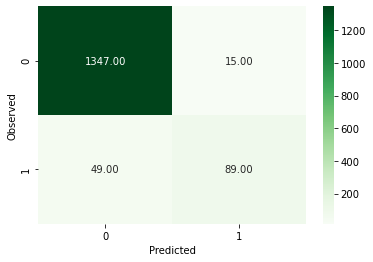

In [61]:
##Confusion matrix ,heatmap representation
draw_cm(Y_test,Y_Predict)

In [62]:
# Recall
print("Recall:",recall_score(Y_test,Y_Predict))

Recall: 0.644927536231884


In [63]:
# Precision
print("Precision:",precision_score(Y_test,Y_Predict))

Precision: 0.8557692307692307


In [64]:
#F1 Score
print("F1 Score:",f1_score(Y_test,Y_Predict))
 

F1 Score: 0.7355371900826446


In [65]:
#ROC AUC Score with predicted probabilities

prob = logreg.predict_proba(X_test)
prob
print("ROC AUC Score :",roc_auc_score(Y_test,prob[:,1]))

ROC AUC Score : 0.968391538445168


In [66]:
#ROC AUC Score  for Y_test and Y Prediction 
roc_auc_score(Y_test,Y_Predict)

0.8169571601864267

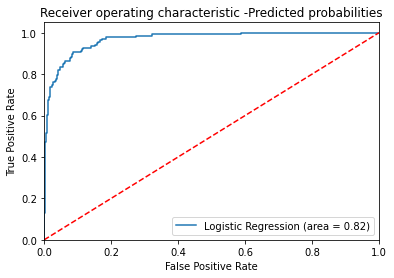

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic -Predicted probabilities')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

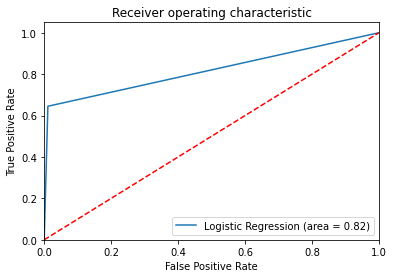

In [68]:
logit_roc_auc = roc_auc_score(Y_test, Y_Predict)
fpr, tpr, thresholds = roc_curve(Y_test, Y_Predict)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 5. Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not?

In [69]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

####  Comparing Solver with L2 Penalty

In [70]:

train_score=[]
test_score=[]
recall=[]
precision=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  
    model.fit(X_train, Y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, Y_train),3))
    test_score.append(round(model.score(X_test, Y_test),3))
    recall.append(round(recall_score(Y_test,y_predict),3))
    precision.append(round(precision_score(Y_test,y_predict),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

print('---recall---')
print(recall)

print('---precision--')
print(precision)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.958, 0.947, 0.953, 0.895, 0.897]

[0.964, 0.954, 0.96, 0.905, 0.905]
---recall---
[0.667, 0.609, 0.638, 0.246, 0.246]
---precision--
[0.92, 0.848, 0.898, 0.466, 0.466]


####  Comparing Solver with L1 Penalty for  liblinear and saga

In [71]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']
recall=[]
precision=[]
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  
    model.fit(X_train, Y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, Y_train),3))
    test_score.append(round(model.score(X_test, Y_test),3))
    recall.append(round(recall_score(Y_test,y_predict),3))
    precision.append(round(precision_score(Y_test,y_predict),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)
print('---recall---')
print(recall)

print('---precision--')
print(precision)

['liblinear', 'saga']

[0.958, 0.896]

[0.963, 0.905]
---recall---
[0.667, 0.246]
---precision--
[0.911, 0.466]


## Highest Accuracy is  newton-cg  with Penalty l2 and  Liblinear with Penalty l1

### Since accuracy is same for  newton-cg and liblinear : Selecting liblinear l1 as the Solver for further tuning

In [72]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear') 

model.fit(X_train, Y_train) 

y_predict = model.predict(X_test)     

print("Training accuracy",model.score(X_train,Y_train))  
print()
print("Testing accuracy",model.score(X_test, Y_test))
print()
print("Recall",recall_score(Y_test,y_predict))
print()
print("Precision",precision_score(Y_test,y_predict))

Training accuracy 0.958

Testing accuracy 0.9653333333333334

Recall 0.6811594202898551

Precision 0.9215686274509803


##### Observation : testing accuracy increases  so not over fitting

#####  Change Classweight and  check Accuracy

In [73]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') 

model.fit(X_train, Y_train) 

y_predict = model.predict(X_test)     

print("Training accuracy",model.score(X_train,Y_train))  
print()
print("Testing accuracy",model.score(X_test, Y_test))
print()
print("Recall",recall_score(Y_test,y_predict))
print()
print("Precision",precision_score(Y_test,y_predict))

Training accuracy 0.8985714285714286

Testing accuracy 0.9046666666666666

Recall 0.927536231884058

Precision 0.4904214559386973


##### Observation :  testing accuracy increases  so not over fitting  , so can keep classweight as balanced
####  The  Recall rate increased  for the balance class weight  , In this case of personal loan campaign the good recall rate is important 

#####  Check Accuracy for   Various C values

In [74]:
train_score=[]
test_score=[]
Cval = [0.01,0.05,0.1,0.25,0.5,0.75,1]
recall=[]
precision=[]
for i in Cval:
    model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced', C = i)  
    model.fit(X_train, Y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, Y_train),3))
    test_score.append(round(model.score(X_test, Y_test),3))
    recall.append(round(recall_score(Y_test,y_predict),3))
    precision.append(round(precision_score(Y_test,y_predict),3))
    
print(Cval)
print()
print('---Train---')
print(train_score)
print()
print('---Test---')
print(test_score)
print()
print('---recall---')
print(recall)
print()
print('---precision--')
print(precision)

[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]

---Train---
[0.843, 0.885, 0.898, 0.9, 0.899, 0.9, 0.899]

---Test---
[0.854, 0.894, 0.907, 0.901, 0.905, 0.905, 0.905]

---recall---
[0.891, 0.928, 0.92, 0.913, 0.928, 0.928, 0.928]

---precision--
[0.376, 0.462, 0.496, 0.481, 0.49, 0.49, 0.49]


##### Observation :  For the C value of 0.5 the testing accuracy increases  so not over fitting  .
#### The Recall and Precision rate is at the best at C=0.5


## The Final model

Training accuracy 0.899

Testing accuracy 0.905

Confusion Matrix


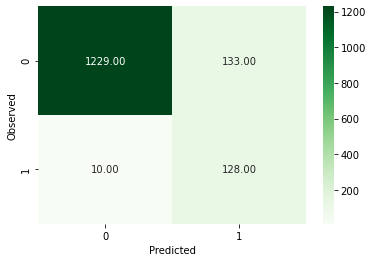

None

Recall: 0.927536231884058

Precision: 0.4904214559386973

F1 Score: 0.6416040100250626

Roc Auc Score: 0.9746749239183639


In [75]:

model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)
print("Training accuracy",round(model.score(X_train,Y_train),3))  
print()
print("Testing accuracy",round(model.score(X_test, Y_test),3))
print()
print('Confusion Matrix')
print(draw_cm(Y_test,y_predict))
print()
print("Recall:",recall_score(Y_test,y_predict))
print()
print("Precision:",precision_score(Y_test,y_predict))
print()
print("F1 Score:",f1_score(Y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Y_test,model.predict_proba(X_test)[:,1]))

### 6. Give Business understanding of your model?

#### Business Insights

**Confusion Matrix  Description**

*True Positives  (Observed=1  and Predicted=1)* 

     Predicted that the customer will accept the personal loan offer and the customer accepted the offer
*True Negatives  (Observed=0  and Predicted=0)* 

     Predicted that the customer will not accept the personal loan offer and the customer did not
*False Positives  (Observed=0  and Predicted=1)* 

     Predicted that the customer will accept the personal loan offer but the customer did not accept the offer in reality
*False Negatives  (Observed=1  and Predicted=0)* 

     Predicted that the customer will not accept the personal loan offer but the customer accepted the loan offer

In this Personal Loan Campaign  context Thera bank wants to convert maximum number of customers into personal loan customers . The ultimate aim is to maximise the conversion rate .
__Here  False Negatives  has to be minimised.__
If the false negative cases are high it will affect the conversion rates of personal loan and potential customers will not be identified.  In the case of false positives the conversion rate will not be affected  and potential conversions will not be lost .

To minimise the  False negatives  __Recall is the important evaluvation metrics.__

### The github link
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-Reena-R/blob/master/Project%20Supervised%20Learning%20-ReenaRajendraPrasad.ipynb